#SALES PREDICTION USING PYTHON

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('Advertising.csv', low_memory=False)
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


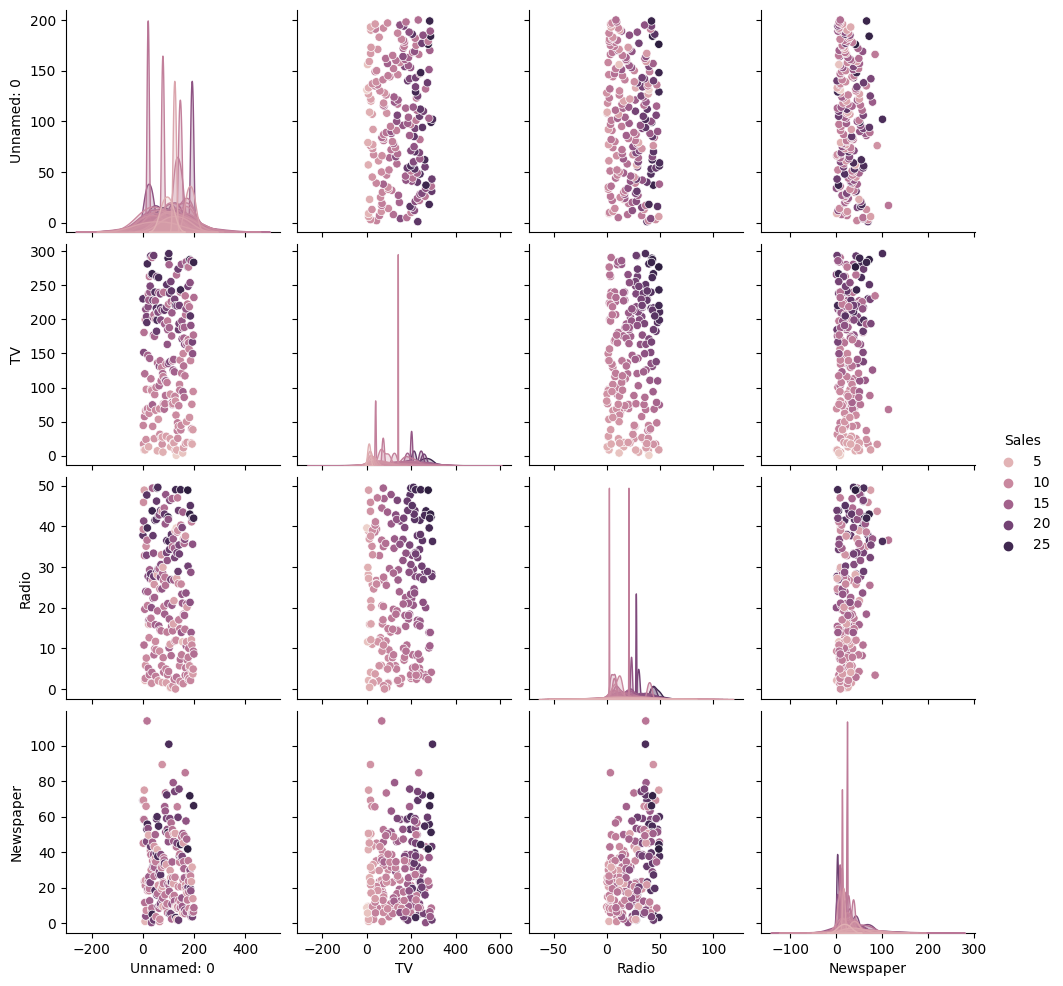

In [5]:
sns.pairplot(df,hue='Sales')

In [6]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

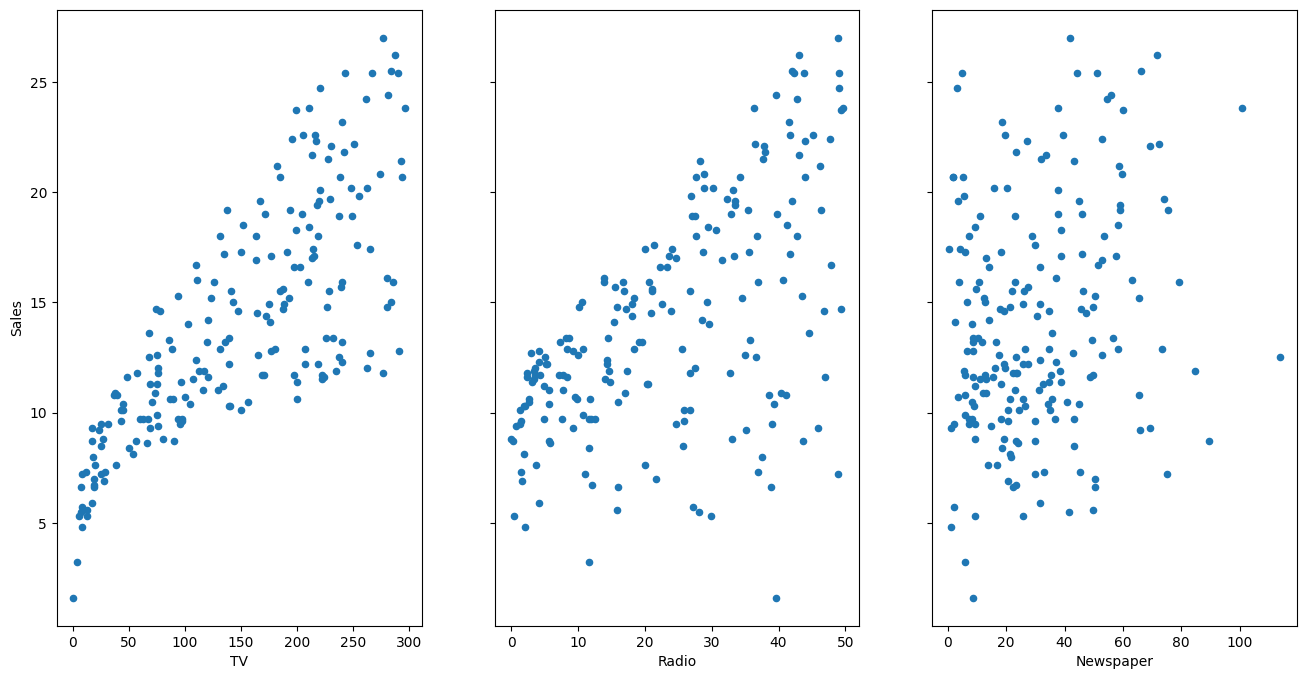

In [7]:
fig,axs= plt.subplots(1,3,sharey=True) 
df.plot(kind="scatter",x='TV',y='Sales',ax=axs[0],figsize=(16,8))
df.plot(kind="scatter",x='Radio',y='Sales',ax=axs[1],figsize=(16,8))
df.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[2],figsize=(16,8))
plt.show()

In [8]:
#Splitting Dataset to Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#apply algo

###Training Multiple Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression
mregressor = LinearRegression()
mregressor.fit(X_train,y_train)
y_mpred = mregressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_mpred.reshape(len(y_mpred),1), y_test.reshape(len(y_test),1)),1))

[[10.06 11.3 ]
 [ 7.45  8.4 ]
 [ 7.02  8.7 ]
 [24.08 25.4 ]
 [12.02 11.7 ]
 [ 6.54  8.7 ]
 [12.78  7.2 ]
 [15.11 13.2 ]
 [10.77  9.2 ]
 [16.34 16.6 ]
 [22.88 24.2 ]
 [ 9.13 10.6 ]
 [10.46 10.5 ]
 [15.49 15.6 ]
 [11.59 11.8 ]
 [12.17 13.2 ]
 [18.77 17.4 ]
 [10.78  1.6 ]
 [15.91 14.7 ]
 [17.31 17.  ]
 [24.07 26.2 ]
 [ 9.6  10.3 ]
 [15.14 14.9 ]
 [12.39 12.9 ]
 [ 5.71  8.1 ]
 [15.25 15.2 ]
 [12.29 12.6 ]
 [20.94 22.6 ]
 [13.41 11.6 ]
 [ 9.04  8.5 ]
 [12.89 12.5 ]
 [21.4  23.7 ]
 [18.14 16.1 ]
 [21.17 21.8 ]
 [ 6.57  5.6 ]
 [ 6.14  6.7 ]
 [ 7.89  9.7 ]
 [13.02 12.9 ]
 [14.69 13.6 ]
 [ 6.19  7.2 ]]


##Training Decision Tree Model

In [10]:

from sklearn.tree import DecisionTreeRegressor
dregressor = DecisionTreeRegressor(random_state = 0)
dregressor.fit(X_train,y_train)
y_dpred = dregressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_dpred.reshape(len(y_dpred),1), y_test.reshape(len(y_test),1)),1))

[[10.9 11.3]
 [ 9.7  8.4]
 [ 8.8  8.7]
 [25.5 25.4]
 [12.9 11.7]
 [ 8.6  8.7]
 [ 6.6  7.2]
 [12.3 13.2]
 [ 8.   9.2]
 [16.6 16.6]
 [25.4 24.2]
 [ 9.9 10.6]
 [10.6 10.5]
 [15.9 15.6]
 [10.9 11.8]
 [11.9 13.2]
 [15.9 17.4]
 [ 6.6  1.6]
 [12.6 14.7]
 [17.4 17. ]
 [25.5 26.2]
 [10.6 10.3]
 [16.6 14.9]
 [12.2 12.9]
 [ 8.6  8.1]
 [14.  15.2]
 [14.1 12.6]
 [20.7 22.6]
 [10.6 11.6]
 [ 6.6  8.5]
 [12.6 12.5]
 [22.4 23.7]
 [15.7 16.1]
 [22.3 21.8]
 [ 5.5  5.6]
 [ 7.   6.7]
 [ 9.7  9.7]
 [14.8 12.9]
 [12.  13.6]
 [ 6.6  7.2]]


##Random Forest Regression

In [11]:
from sklearn.ensemble import RandomForestRegressor
rregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rregressor.fit(X_train,y_train)
y_rpred = rregressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_rpred.reshape(len(y_rpred),1), y_test.reshape(len(y_test),1)),1))

[[10.6  11.3 ]
 [ 9.8   8.4 ]
 [ 9.63  8.7 ]
 [25.15 25.4 ]
 [12.92 11.7 ]
 [ 9.2   8.7 ]
 [ 6.71  7.2 ]
 [12.65 13.2 ]
 [ 8.68  9.2 ]
 [16.91 16.6 ]
 [24.8  24.2 ]
 [10.66 10.6 ]
 [10.39 10.5 ]
 [15.23 15.6 ]
 [11.35 11.8 ]
 [12.15 13.2 ]
 [15.82 17.4 ]
 [ 5.51  1.6 ]
 [13.36 14.7 ]
 [17.36 17.  ]
 [24.85 26.2 ]
 [10.5  10.3 ]
 [15.26 14.9 ]
 [12.27 12.9 ]
 [ 8.84  8.1 ]
 [14.34 15.2 ]
 [13.88 12.6 ]
 [21.65 22.6 ]
 [11.36 11.6 ]
 [ 7.83  8.5 ]
 [13.03 12.5 ]
 [22.47 23.7 ]
 [15.08 16.1 ]
 [22.5  21.8 ]
 [ 6.22  5.6 ]
 [ 6.79  6.7 ]
 [ 9.79  9.7 ]
 [14.26 12.9 ]
 [13.12 13.6 ]
 [ 7.07  7.2 ]]


#Evaluating Regression Model

##Evaluating Multiple Linear Regression Model

In [12]:
r2_score(y_test,y_mpred)*100

86.01145185017867

##Evaluating Decision Tree Regression Model

In [13]:
r2_score(y_test, y_dpred)*100

94.66625462675997

##Evaluating Random Forest Regression Model

In [14]:
r2_score(y_test, y_rpred)*100

96.81456873542609